# Information Criterion<br><sub>and Model Selection continued</sub>


### Mixture Models 

Again...

$$\scriptsize
\begin{align*}
x_i \sim {} & \sum_{k=1}^K \mathbf{v}_{ik} \mathcal N (\mu_k,\sigma_k^2) & \mu_k \sim {} & \mathcal N (\mu_{k0},\sigma_{k0}^2) \quad \sigma_k^2 \sim \text{Inverse-Gamma} (\alpha_{k0}, \beta_{k0})\\
\overset{\overset{\text{multinomial}}{\mathbf{v}_i\,\sim\,\text{MN}}(\mathbf{p}, \,n=1)}{\Pr(\mathbf{v}_i|E[\mathbf{v}_i]=\mathbf{p}, n=1)} = {}& \frac{n!}{v_1!\cdots v_K!} p_1^{\mathbf{v}_{i1}} \cdots p_K^{\mathbf{v}_{iK}}  & \sum_{j=1}^n \mathbf{v}_{ik} = {}& 1 \quad \mathbf{v}_{ik} \in \{0,1\} \quad \text{latent (unknown) subpulation membership $\textbf{v}$} \\
\underset{\text{Dirichlet}}{\overset{p\,\sim\,\text{Dir}(\boldsymbol \alpha)}{p\left(\mathbf{p}|\boldsymbol \alpha \right)}} = {}& {\frac {1}{\mathrm {B} ({\boldsymbol {\alpha }})}}\prod _{k=1}^{K}p_{k}^{\alpha _{k}-1} & \sum_{j=1}^np_k = {}& 1 \quad {\displaystyle \mathrm {B} ({\boldsymbol {\alpha }})= \prod \limits _{k=1}^{K}\Gamma (\alpha _{k}) \bigg/ \Gamma \left(\sum \limits _{k=1}^{K}\alpha _{k}\right)} \quad E[p_k] = \alpha_k\bigg/\sum_{k=1}^K \alpha_k 
\end{align*}$$

$$\scriptsize
\begin{align*}
p(\mu_k | -) \propto {} & \mathcal N (\mu_k| \mu_{k0},\sigma_{k0}^2) \prod_{i=1}^n \sum_{k=1}^K\mathbf{v}_{ik} \mathcal N (x_i | \mu_k,\sigma_k^2) & p(\sigma_k^2 | -) \propto {} & \underset{\text{Inverse-Gamma}}{\text{IG} (\sigma_k^2|\alpha_{k0}, \beta_{k0})} \prod_{i=1}^n \sum_{k=1}^K\mathbf{v}_{ik} \mathcal N (x_i|\mu_k,\sigma_k^2)
\end{align*}$$
$$\scriptsize
\begin{align*}
\Pr(\mathbf{v}_{ik}=1|-) \propto {} & p_1^{\mathbf{v}_{i1}} \cdots p_K^{\mathbf{v}_{iK}} \sum_{k=1}^K\mathbf{v}_{ik} \mathcal N (x_i | \mu_k,\sigma_k^2) & p(\mathbf{p}| - ) \propto {}& \prod _{k=1}^{K}p_{k}^{\alpha _{k}-1} \prod_{i=1}^{n} p_1^{\mathbf{v}_{i1}} \cdots p_K^{\mathbf{v}_{iK}}
\end{align*}$$

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

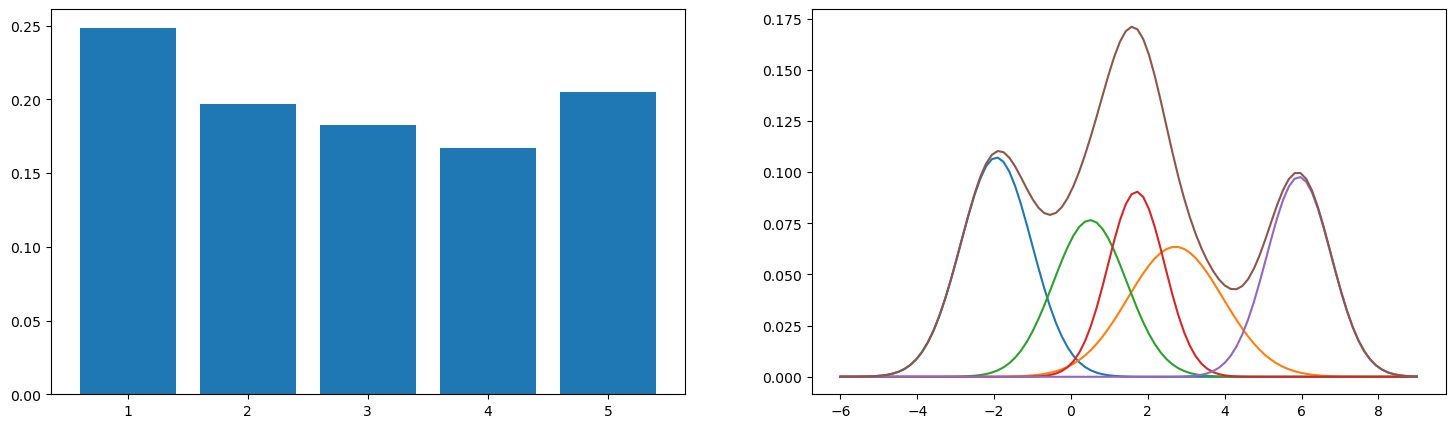

In [3]:
np.random.seed(9)

k = 5
alpha = [2]*k
p_true = stats.dirichlet(alpha).rvs(1)[0] # p_true.sum() # 1

mu_k_true = stats.norm(0,3).rvs(k)
support = np.linspace(-6,9,100)
population_pdf = 0*support
sigma2_k_true = stats.halfnorm().rvs(k)

fig,ax = plt.subplots(1,2,figsize=(18,5))
ax[0].bar(x=np.linspace(1,5,5), height=p_true)
for j in range(k):
    subpopulation_pdf = p_true[j]*stats.norm(mu_k_true[j],sigma2_k_true[j]**0.5).pdf(support)
    ax[1].plot(support, subpopulation_pdf); population_pdf += subpopulation_pdf
    
ax[1].plot(support, population_pdf); 

In [4]:
n_ = 1000
v_true = stats.multinomial(n=1,p=p_true).rvs(n_)
v_true[:3,:]

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [5]:
print(mu_k_true)
print((v_true*mu_k_true)[:3,:])
print((v_true*mu_k_true).sum(axis=1)[:3])

[-1.94384238  2.715657    0.49645017  1.70025387  5.93193509]
[[-1.94384238  0.          0.          0.          0.        ]
 [-1.94384238  0.          0.          0.          0.        ]
 [-0.          0.          0.49645017  0.          0.        ]]
[-1.94384238 -1.94384238  0.49645017]


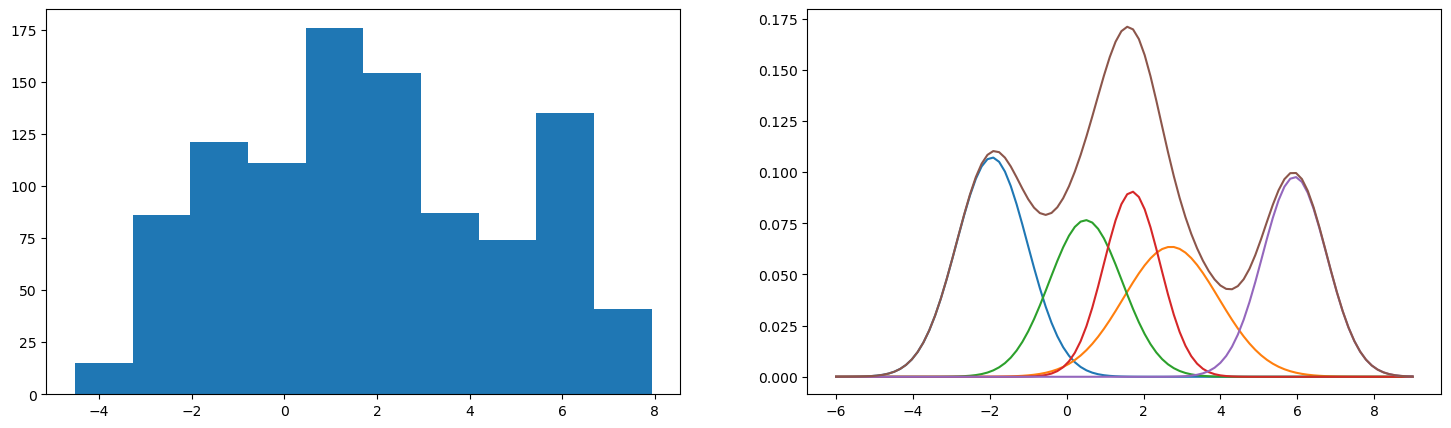

In [6]:
x_ = stats.norm((v_true*mu_k_true).sum(axis=1), (v_true*sigma2_k_true).sum(axis=1)**0.5).rvs()
ax[0].hist(x_)
fig

## Back to Model Selection

### LRT

The **(nested) log likelihood ratio test (LRT) statistic** is $\quad2\log\left(\frac{p(y|\hat \theta_{M_1})}{p(y|\hat \theta_{M_0)}}\right) = \color{gray}{2(\log(p(y|\hat \theta_{M_1})) - \log(p(y|\hat \theta_{M_0})))} $ 

and has an asymptotically $\;\chi^2_{df}\;$ distribution with **expected value** [equal](https://en.wikipedia.org/wiki/Likelihood-ratio_test) **degrees of freedom**  $\dim(\theta_{M_1})-\dim(\theta_{M_0})$

$$2\log\left(\frac{p(y|X_{n\times p}\hat \beta)}{p(y|\bar y)}\right)\quad \text{is asymptotically} \;\;\chi^2_{p-1}\;\;\text{and a large LRT statistic rejects $M_0$ in favor of $M_1$} $$

> #### Sketch of Some "Intuition" as to Why this is so
> 
> - $p(y|\hat \theta_{M})$ is assymptotically normal 
> - $\frac{p(y|\hat \theta_{M_1})}{p(y|\hat \theta_{M_0})}$ cancels normalizing constants
> - $\log p(y|\hat \theta_{M})$ after canceling normalizing constants, and since one parameter $\theta_i$ perfectly predicts one $\theta_i=y_i$, is $-\frac{1}{2}\sum_{i=1}^{n-\text{dim}(M)+1} \frac{(y_i-\bar y)^2}{\sigma^2} -\frac{1}{2}\sum_{i=1}^{\text{dim}(M)-1} \frac{(y_j-y_j)^2}{\sigma^2}$
> - $E[\frac{(y_i-\bar y)^2}{\sigma^2}] = 1$ so the $-\frac{1}{2}$ term makes difference $\text{dim}(M)-1$ and cancels the scaling $2$

### Deviance  and "Bayesian" Model Size

Model **deviance** is $\quad D(\theta) = 2(\underset{\text{a constant}}{\overset{\text{saturated model}}{\log(p(y|y))}} - \overset{\text{actual model}}{\log(p(y|\theta)})) \color{gray}{= 2\log\left(\frac{p(y|y)}{p(y|\theta)}\right)} \geq 0 \quad$ (scaled by $2$ [to match the LR](https://stats.stackexchange.com/qu,estions/379810/why-is-the-deviance-defined-with-a-factor-2-or-likelihood-ratio-squared))

The [Bayesian characterization](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=d78ad2497639bff740d0c1181c35263d2630b172)
 of the **effective number of parameters** in a model is

$$p_D = {\overline{D(\theta)} - D(\bar{\theta})} \color{gray}{= 2(\log(p(y|\bar{\theta})) - \overline{\log(p(y|\theta))}) \underset{\text{usually}}{\geq 0}} \quad \text{ or } \quad \underset{\text{not typically preferred as it's less stable}}{p_D = 2\text{Var}_{p(\theta|y)}[\log(p(y|\theta))]}$$

because (for fixed models such as ["linear models with uniform prior distributions"](http://www.stat.columbia.edu/~gelman/research/published/waic_understand3.pdf) and large $n$) both versions of $p_D$ estimate the degrees of freedom parameter of the asymptotic $\chi^2_{\text{df}}$ of $\log(p(y|\theta))$ which is the number of parameters $p(y|\theta)$.

> #### Sketch of the "Proof" as to Why this is so
> 
> $-2\log(p(y|\bar{\theta})$ for linear regression is the expected standardized residual sum of squares
> 
$$
\begin{align*}
(y-\hat y)^T(y-\hat y)/\sigma^2 &={} y^T(I-H)^T(I-H)y/\sigma^2
= y^T(I-H)(I-H)y/\sigma^2 
= y^T(I-H)y/\sigma^2 \\
&={} (X\beta + \epsilon)^T(I-H)(X\beta + \epsilon)/\sigma^2
= \epsilon^T(I-H)\epsilon/\sigma^2 = \text{trace}(\epsilon^T(I-H)\epsilon/\sigma^2)\\
&={} \text{trace}((I-H)\epsilon\epsilon^T/\sigma^2) = \text{trace}((I-H)\epsilon\epsilon^T/\sigma^2) \\
\text{with expected value} & \quad \; \text{trace}((I-H)\sigma^2I/\sigma^2) = \text{trace}(I-H) = n - \text{trace}(H)\\
&={} n - \text{trace}(X^T(X^TX)^{-1}X) = n - \text{trace}((X^TX)^{-1}XX^T) = n - \text{trace}(I_{p \times p})\\
&={} n - p
\end{align*}$$
>
> while $-2\overline{\log(p(y|\theta))}$ does something like reflect the variability of $n-p$ unexplained data points plus the variability of $p$ parameters 
> $E_{\hat y}[\sum_{i=1}^n \frac{(y_i - \hat y_i)^2}{\sigma^2} ] \overset{\text{if unbiased}}{\approx} E_{\hat y}[\sum_{i=1}^n \frac{(y_i - E[y_i])^2}{\sigma^2} ]$ which has an expected value (with respect to $y$) of $n$.

### Information Criterion

**Information Criterion** criterion refer to the fact that each additional parameter is expected to decrease $-2\log f(y | \theta)$ by $1$ unit, where a lower negative loglikelihood is "better". 

Rearranging $\;\;p_D = {\overline{D(\theta)} - D(\bar{\theta})}\;\;$ in terms of **posterior mean deviance** $\;\;\overline{D(\theta)} = D(\bar{\theta}) + p_D\;\;$ leads to the ["adequacy" "measure of fit plus complexity"](https://fisher.stats.uwo.ca/faculty/aim/2015/9938/articles/SpiegelhalterJRSSB2002.pdf) **deviance information criterion** in the standard **information criterion form**

\begin{align*}
\text{DIC:} \;{}& -2\log(p(y|\bar{\theta})) + 2p_D \quad\;\;\text{since} \quad \overline{D(\theta)}+p_D = D(\bar{\theta}) + 2p_D \quad \text{$p(y|y)$'s cancel in DIC$_{M_1}$-DIC$_{M_0}$}\\
\text{AIC:} \;{}& -2\log(p(y|\hat{\theta})) + 2p \quad\quad\, \text{and $\quad e^{(\text{AIC$_{M_0}$-AIC$_{M_1}$})/2}\quad$ is an unnested version of the }\textbf{LRT statistic}\\
\text{BIC:} \;{}& -2\log(p(y|\hat{\theta})) + p\ln(n) \;\;\, \text{which approximates }\textbf{Bayes Factor} K = \frac{p(\mathbf{x}|M_1)}{p(\mathbf{x}|M_0)} \approx e^{(BIC_{M_0}-BIC_{M_1})/2}
\end{align*}

### Out of sample predictive performance 

Recall that **Bayes factors** induce an **Occam's razor** (parameter integration dimension) penalization for model complexity; whereas, **DIC** and [**AIC**](https://stats.stackexchange.com/questions/116935/comparing-non-nested-models-with-aic) measure ["out-of-sample-prediction error using a bias-corrected adjustment of within-sample error"](http://www.stat.columbia.edu/~gelman/research/published/waic_understand3.pdf) 

Even though the **Bayesian Occam's razor** (with **Bayes factors**) naturally favoring parsimony in model selection is intuitively attractive, this "simplest solution is the best solution" perspective is not necessarily always justified.

- It is still reasonable to prefer more complex models with improved out of sample performance 

**Machine learning $K$-folds cross-validation parameter tuning** optimizes the *bias-variance tradeoff** in a model fit which allows the model to be both underfit and overfit in different areas of the prediction space and so improves the overall out of sample predictive accuracy by reducing bias in critical areas while inducing minimal "collatoral damage" from overfitting in other areas.

- **Bayesian Occam's razor** (with **Bayes factors**) does not attempt to optimize the **bias-variance tradeoff** in this "overfitting" manner; rather, it penalizes "prior misspecifications" that are increasingly unavoidable in higher dimensions and can rapidly overwhelm the potential beneficial increases in model flexibility observable in the likelihood. 


### Widely Applicable Information Criterion (WAIC)<br> and Leave-One-Out Cross Validation (LOO-CV) 

- ***BIC:*** $\;-2\log(p(y|\hat{\theta})) + p \ln(n)\;$ is based on approximating ***Bayes factors***
    - but it's not actualy a **Bayesian** method since it doesn't integrate over the **posterior uncertainty**
- **DIC:** $\;-2\log(p(y|\bar{\theta})) + 2p_D\;$ is similarly not **fully Bayesian**
    - since $p_D \color{gray}{= {\overline{D(\theta)} - D(\bar{\theta})}} = \color{navy}{2(\log(p(y|\bar{\theta})) - \overline{\log(p(y|\theta))})}$ 
    - **conditions** on the **posterior mean** $\bar{\theta}$ rather than integrating over the **posterior uncertainty**(!)
    - The alternative $\color{purple}{\;p_D = 2\text{Var}_{p(\theta|y)}[\log(p(y|\theta))]\;}$ was unstable but it was **fully Bayesian**...

**WAIC** uses the **log pointwise predictive density** $llpd = \log\left(\prod_{i=1}^n p(y_i|\theta)\right)$ to estimate **effective model size** as

$$\color{purple}{\;p_{\text{WAIC2}} = \sum_{i=1}^n\text{Var}_{p(\theta|y)}[\log(p(y_i|\theta))]\quad \color{gray}{\text{(although note there's no longer a factor of $2$ [proof not shown])}}}$$
which provide stable estimation, and is preferred over the (also **fully Bayeisan**) $$\;\color{navy}{p_{\text{WAIC1}} = 2\sum_{i=1}^n\left(\log\left( \frac{1}{T}\sum_{t=1}^T p(y_i|\theta^{(t)}) \right) - \frac{1}{T}\sum_{t=1}^T\log(p(y_i|\theta^{(t)}))\right)\;}$$ because $p_{\text{WAIC2}}$ <u>is theoretically and empirically more similar to a **LOO-CV**</u> calculation than $p_{\text{WAIC1}}$ <font style='color:gray'></font>


The above **information criterion** can now be extended with 

$\quad\quad\text{WAIC:} \;-2\sum_{i=1}^n\left(\log\overline{p(y_i|\theta)}\right) + 2p_{\text{WAIC2}} =  -2\sum_{i=1}^n\left(\log\left( \frac{1}{T}\sum_{t=1}^T p(y_i|\theta^{(t)}) \right)\right) + 2p_{\text{WAIC2}}$

---

The difference bewteen **WAIC** and **DIC** is that **WAIC** fully integrates over the posterior while **DIC** does not and instead conditions on the **posterior parameter mean**

- They both are "more Bayesian" than the **AIC** in incorporate the **prior** into **effective model size** estimation
- and in the same way both are "more Bayesian" than the **BIC** even though it approximates **Bayes factors**

> <font style='color:navy'>And anyway remember that **BIC** does not estimate ["out-of-sample-prediction error using a bias-corrected adjustment of within-sample error"](http://www.stat.columbia.edu/~gelman/research/published/waic_understand3.pdf)</font>


But ***WAIC*** is just a computationally tractable alternative to  
***bias corrected <u>log pointwise predictive density</u> $lppd$ Leave-One-Out Cross Validation (LOO-CV)***

$$\overset{\text{corrected}}{lppd_{loo-cv}}=\sum_{i=1}^n\log \underbrace{\left(\frac{1}{T}\sum_{t=1}^T p(y_i|\theta^{(t|-i)})\right)}_{\theta^{(t|-i)} \sim p(\theta|y_{-i})} + \underset{\text{due to using $n-1$ not $n$}}{\underbrace{lppd-\overline{lppd^{(-i)}}}_{\text{underestimated accuracy}}}$$

with ***AIC***, ***DIC*** and ***WAIC*** are asymptotically equivalent to ***log pointwise predictive density LOO-CV*** under various conditions...


In [7]:
import pymc as pm
import arviz as az 

In [8]:
with pm.Model() as mixture_model:
    w = pm.Dirichlet('w', a=[1]*k)
    v = pm.Categorical('v', p=w, size=n_) 
    #v = pm.Multinomial('v', n=1, p=w, size=n_)
    mu = pm.Normal('μ', mu=mu_k_true, sigma=2, size=k)#size=(1,k))
    sigma = pm.HalfNormal('σ', sigma=2, size=k)#size=(1,k))
    pm.Normal('y', mu=mu[v], sigma=sigma[v], observed=x_) 
    #pm.Normal('y', mu=(mu*v).sum(axis=1), 
    #                   sigma=(sigma**0.5*v).sum(axis=1), observed=x_)
    idata_ = pm.sample()    

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [w, μ, σ]
>CategoricalGibbsMetropolis: [v]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 98 seconds.
There were 246 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


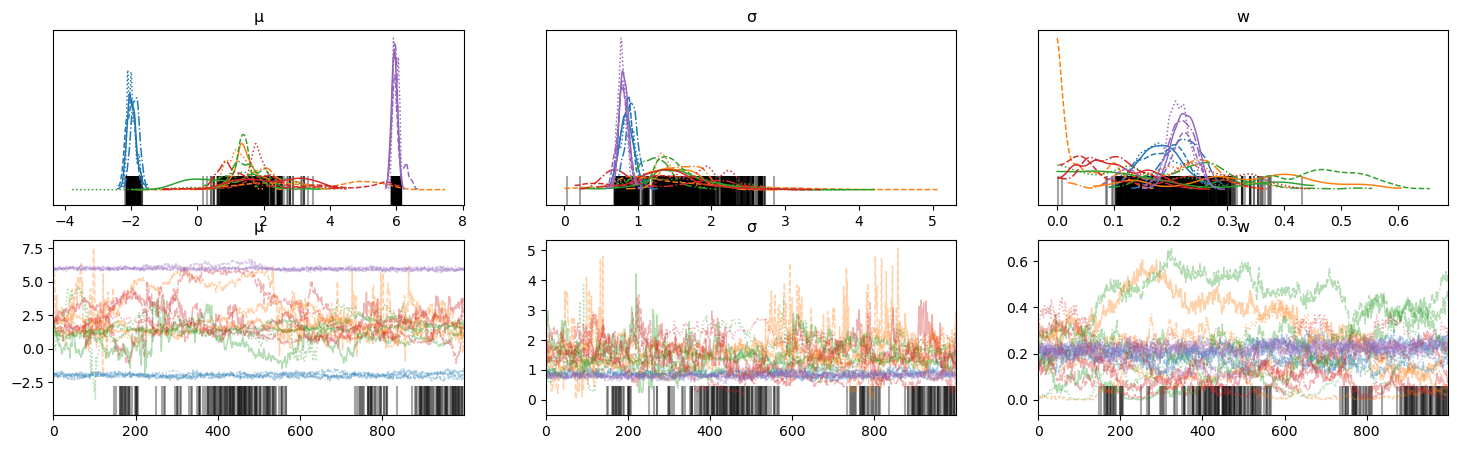

In [9]:
fig,ax = plt.subplots(2,3,figsize=(18,5))
az.plot_trace(idata_, var_names=['μ','σ','w'], axes=ax.T); 

In [20]:
k_4 = 4
with pm.Model(coords={"cluster": range(k_4)}) as model_k_4:
    
    μ = pm.Normal("μ", mu=[-2, 0, 2, 4], sigma=2, 
                  transform=pm.distributions.transforms.univariate_ordered, 
                  initval=[-2, 0, 2, 4], dims="cluster")
    σ = pm.HalfNormal("σ", sigma=1, dims="cluster")
    weights = pm.Dirichlet("w", 2*np.ones(k_4), dims="cluster")
    pm.NormalMixture("y", w=weights, mu=μ, sigma=σ, observed=x_)
    
    idata_k_4 = pm.sample()

/Users/aryanmisra/miniforge3/envs/pymc_env/lib/python3.12/site-packages/pymc/distributions/transforms.py:56: FutureWarning: univariate_ordered has been deprecated, use ordered instead.
  warnings.warn(f"{name} has been deprecated, use ordered instead.", FutureWarning)
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ, w]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
There were 206 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


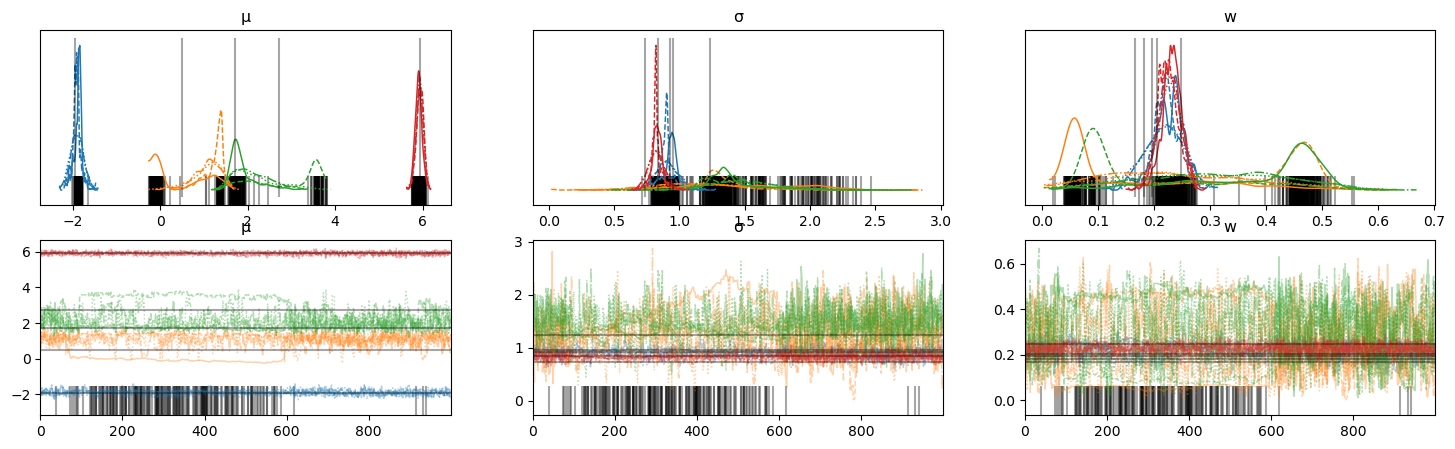

In [21]:
fig,ax = plt.subplots(2,3,figsize=(18,5))
az.plot_trace(idata_k_4, var_names=["μ", "σ", "w"], 
                     lines=[("μ", {}, [mu_k_true]), 
                            ("σ", {}, [sigma2_k_true**0.5]), 
                            ("w", {}, [p_true])], axes=ax.T);

In [22]:
k_3 = 3
with pm.Model(coords={"cluster": range(k_3)}) as model_k_3:
    
    μ = pm.Normal("μ", mu=[-2, 1, 4], sigma=2, 
                  transform=pm.distributions.transforms.univariate_ordered, 
                  initval=[-2, 1, 4], dims="cluster")
    σ = pm.HalfNormal("σ", sigma=1, dims="cluster")
    weights = pm.Dirichlet("w", 2*np.ones(k_3), dims="cluster")
    pm.NormalMixture("y", w=weights, mu=μ, sigma=σ, observed=x_)
    
    idata_k_3 = pm.sample()

/Users/aryanmisra/miniforge3/envs/pymc_env/lib/python3.12/site-packages/pymc/distributions/transforms.py:56: FutureWarning: univariate_ordered has been deprecated, use ordered instead.
  warnings.warn(f"{name} has been deprecated, use ordered instead.", FutureWarning)
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ, w]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [23]:
k_2 = 2
with pm.Model(coords={"cluster": range(k_2)}) as model_k_2:
    
    μ = pm.Normal("μ", mu=[-1, 2], sigma=2, 
                  transform=pm.distributions.transforms.univariate_ordered, 
                  initval=[-1, 2,], dims="cluster")
    σ = pm.HalfNormal("σ", sigma=1, dims="cluster")
    weights = pm.Dirichlet("w", 2*np.ones(k_2), dims="cluster")
    pm.NormalMixture("y", w=weights, mu=μ, sigma=σ, observed=x_)
    
    idata_k_2 = pm.sample()

/Users/aryanmisra/miniforge3/envs/pymc_env/lib/python3.12/site-packages/pymc/distributions/transforms.py:56: FutureWarning: univariate_ordered has been deprecated, use ordered instead.
  warnings.warn(f"{name} has been deprecated, use ordered instead.", FutureWarning)
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ, w]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [24]:
k_5 = 5

with pm.Model(coords={"cluster": range(k_5)}) as model_k_5:
    
    μ = pm.Normal("μ", mu=mu_k_true[np.argsort(mu_k_true)], sigma=2, 
                  transform=pm.distributions.transforms.univariate_ordered, 
                  initval=mu_k_true[np.argsort(mu_k_true)], dims="cluster")
    σ = pm.HalfNormal("σ", sigma=2, dims="cluster")
    weights = pm.Dirichlet("w", np.ones(k_5), dims="cluster")
    pm.NormalMixture("y", w=weights, mu=μ, sigma=σ, observed=x_)
    
    idata_k_5 = pm.sample()

/Users/aryanmisra/miniforge3/envs/pymc_env/lib/python3.12/site-packages/pymc/distributions/transforms.py:56: FutureWarning: univariate_ordered has been deprecated, use ordered instead.
  warnings.warn(f"{name} has been deprecated, use ordered instead.", FutureWarning)
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ, w]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 46 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


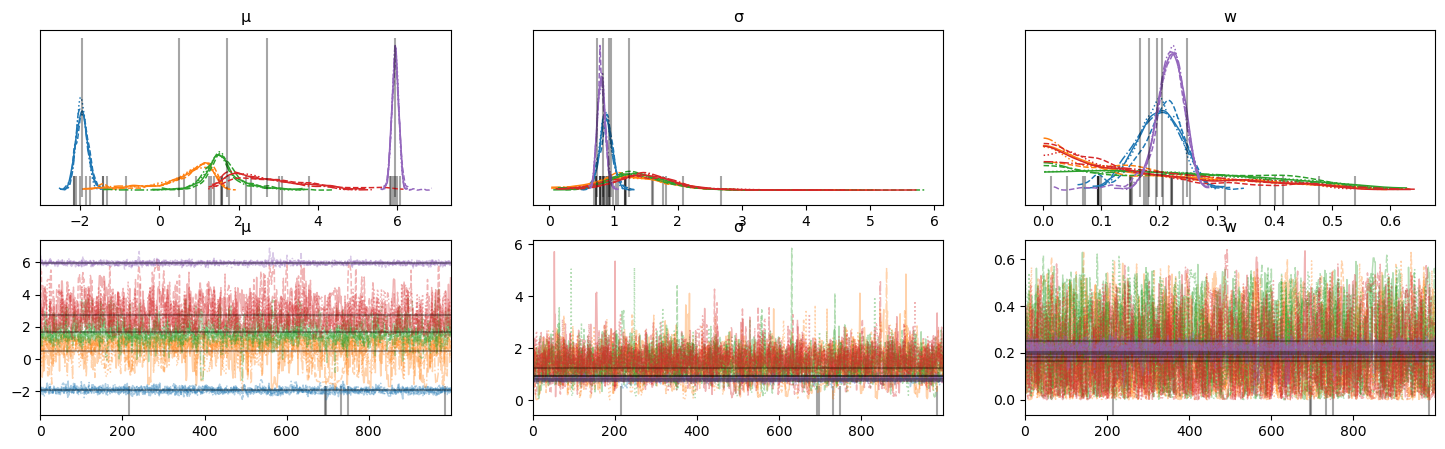

In [25]:
fig,ax = plt.subplots(2,3,figsize=(18,5))
az.plot_trace(idata_k_5, var_names=["μ", "σ", "w"], 
                     lines=[("μ", {}, [mu_k_true]), 
                            ("σ", {}, [sigma2_k_true**0.5]), 
                            ("w", {}, [p_true])], axes=ax.T);

In [26]:
with mixture_model:    
    if 'log_likelihood' in idata_.groups:
        del idata_.log_likelihood
    pm.compute_log_likelihood(idata_)    
    # or pass `idata_kwargs={"log_likelihood": True}` to `pm.sample`
with model_k_4:
    if 'log_likelihood' in idata_k_4.groups:
        del idata_k_4.log_likelihood
    pm.compute_log_likelihood(idata_k_4) 
    # pm.sample(idata_k_4, idata_kwargs={"log_likelihood": True})
with model_k_3:
    if 'log_likelihood' in idata_k_3.groups:
        del idata_k_3.log_likelihood
    pm.compute_log_likelihood(idata_k_3)
with model_k_2:
    if 'log_likelihood' in idata_k_2.groups:
        del idata_k_2.log_likelihood
    pm.compute_log_likelihood(idata_k_2)
with model_k_5:
    if 'log_likelihood' in idata_k_5.groups:
        del idata_k_5.log_likelihood
    pm.compute_log_likelihood(idata_k_5)


TypeError: argument of type 'method' is not iterable

In [176]:
#az.loo(trace_p); az.loo(trace_h_nc); az.waic(trace_p); az.waic(trace_h_nc)
az.compare({"5 components v2": idata_k_5,
            "5 components": idata_,
            "4 components": idata_k_4, 
            "3 components": idata_k_3, 
            "2 components": idata_k_2}, ic='loo')#ic='waic')


/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/arviz/stats/stats.py:1037: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
5 components,0,-2147.543308,710.169868,0.000000,1.000000e+00,21.580034,0.000000,True,log
3 components,1,-2384.324553,7.722610,236.781245,3.190184e-10,14.788332,14.482885,False,log
4 components,2,-2384.685697,8.777748,237.142389,3.203329e-10,14.745650,14.466903,False,log
5 components v2,3,-2385.744267,9.120751,238.200959,2.941015e-10,14.701816,14.413631,False,log
2 components,4,-2410.710147,4.398537,263.166839,0.000000e+00,14.960525,14.077096,False,log


In [177]:
# https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/model_comparison.html
az.compare({"5 components v2": idata_k_5,
            "5 components": idata_,
            "4 components": idata_k_4, 
            "3 components": idata_k_3, 
            "2 components": idata_k_2}, ic='waic')#ic='loo')


/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
5 components,0,-1807.624356,370.250916,0.000000,1.000000e+00,15.023807,0.000000,True,log
3 components,1,-2384.312380,7.710437,576.688025,2.172906e-13,14.787812,8.302460,False,log
4 components,2,-2384.667147,8.759198,577.042791,2.573856e-13,14.744583,8.363904,False,log
5 components v2,3,-2385.715893,9.092377,578.091537,1.486659e-13,14.699357,8.421368,False,log
2 components,4,-2410.703983,4.392374,603.079628,0.000000e+00,14.960331,12.466922,False,log


/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/arviz/stats/stats.py:1037: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


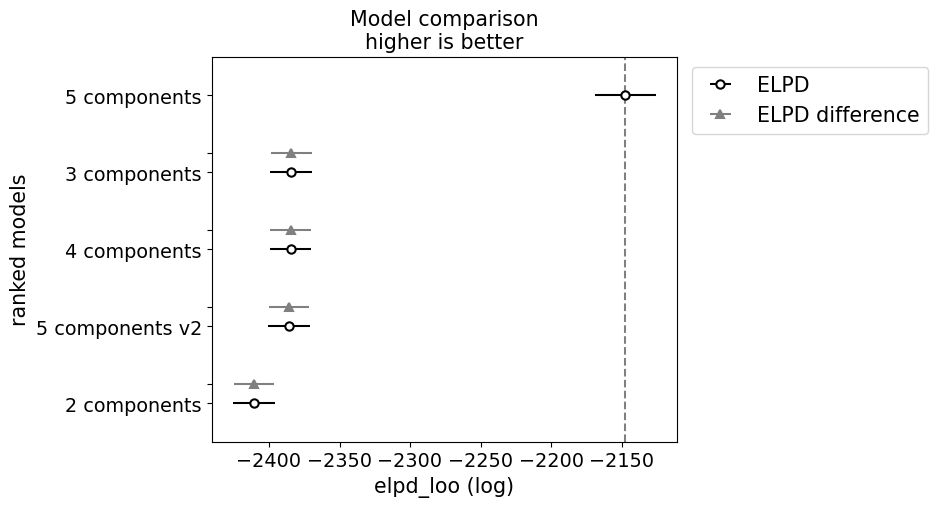

In [178]:
az.plot_compare(az.compare({"5 components": idata_,
                            "4 components": idata_k_4, 
                            "3 components": idata_k_3,
                            "2 components": idata_k_2,
                            "5 components v2": idata_k_5}), insample_dev=False);

## Posterior Predictive Distributions
- https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/posterior_predictive.html

Sampling: [y]


(0.0, 0.25)

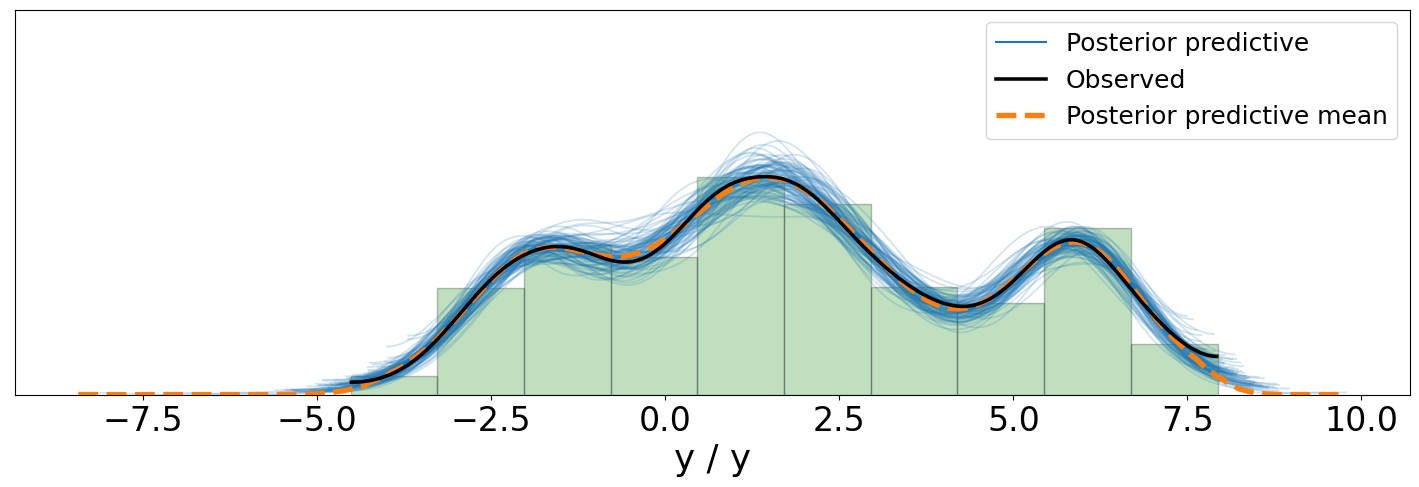

In [183]:
with mixture_model:
    pm.sample_posterior_predictive(idata_, extend_inferencedata=True)

fig = az.plot_ppc(idata_, num_pp_samples=100, figsize=(18,5))
fig.hist(x_, density=True, color='green', edgecolor='black', alpha=0.25)
fig.set_ylim([0,.25])    

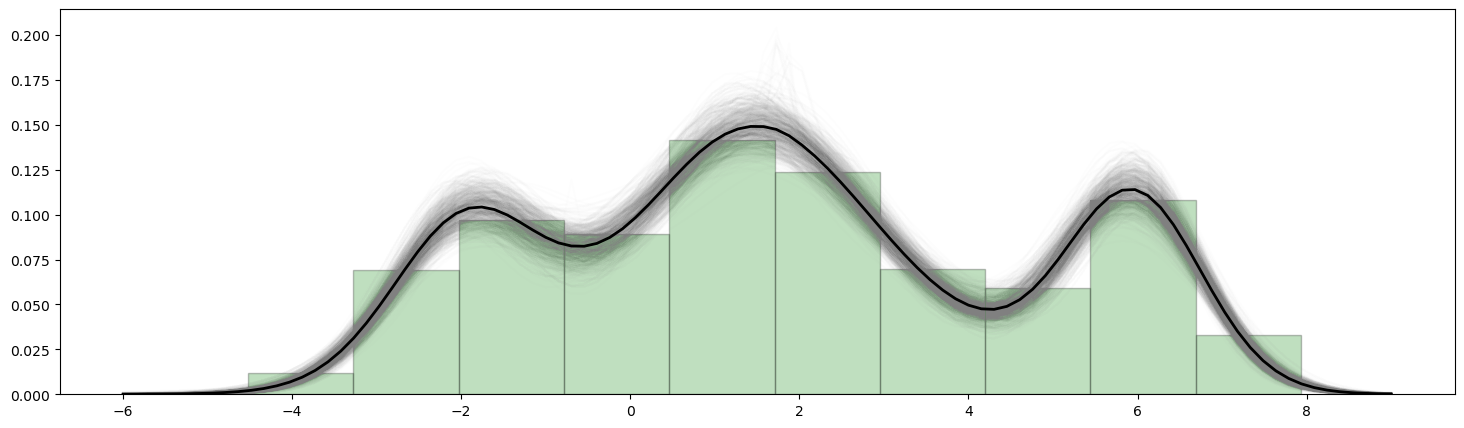

In [179]:
plt.figure(figsize=(18,5))
ave_mixture=0*support
reps=1000
for j in range(reps):
    
    chain,draw=np.random.choice([0,1,2,3]),np.random.choice(np.linspace(0,999,1000,dtype=int))
    
    mixture = stats.norm(idata_.posterior['μ'][chain,draw],
                         idata_.posterior['σ'][chain,draw]).pdf(np.array([support]*5).reshape(5,100).T)    
    mixture = (mixture*idata_.posterior['w'][chain,draw].values).sum(axis=1)
    
    plt.plot(support, mixture, c='gray', alpha=0.01); ave_mixture += mixture/reps
plt.plot(support, ave_mixture, 'k', lw=2)
plt.hist(x_, density=True, color='green', edgecolor='black', alpha=0.25);

Sampling: [y]


(0.0, 0.25)

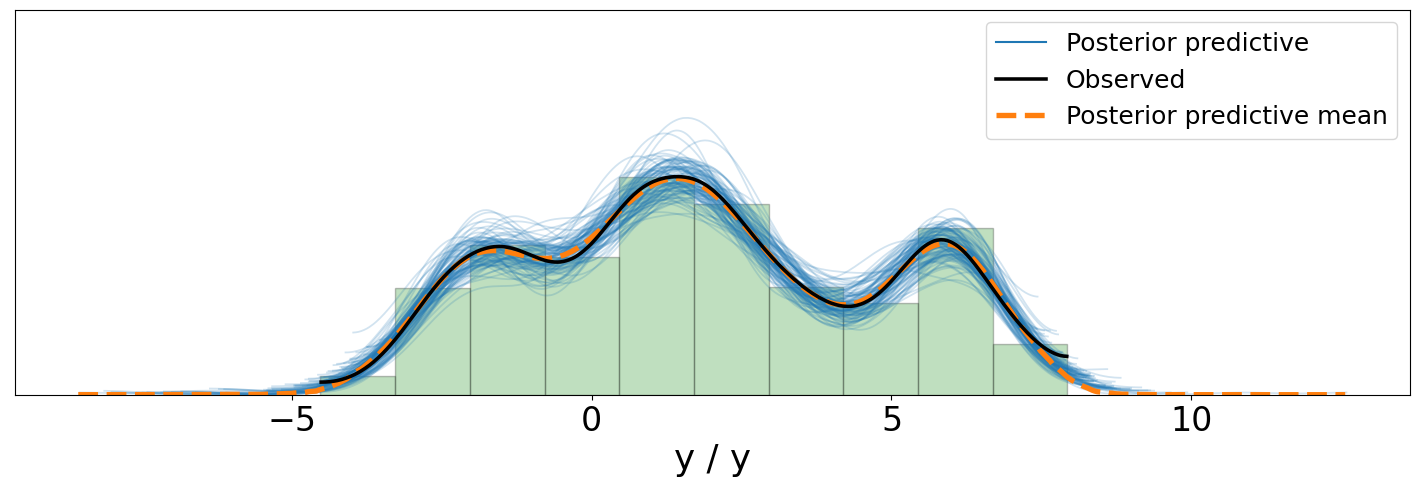

In [180]:
with model_k5:
    pm.sample_posterior_predictive(idata_k_5, extend_inferencedata=True)
    
fig = az.plot_ppc(idata_k_5, num_pp_samples=100, figsize=(18,5))
fig.hist(x_, density=True, color='green', edgecolor='black', alpha=0.25)
fig.set_ylim([0,.25])    

Sampling: [y]


(0.0, 0.25)

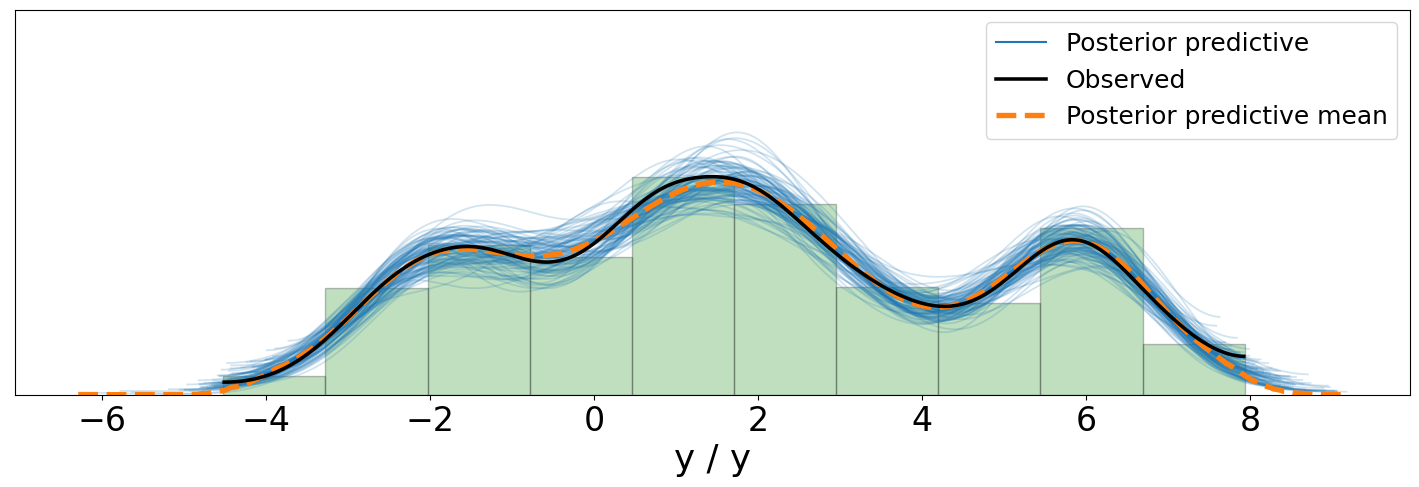

In [147]:
with model_k3:
    pm.sample_posterior_predictive(idata_k_3, extend_inferencedata=True)
    
fig = az.plot_ppc(idata_k_3, num_pp_samples=100, figsize=(18,5))
fig.hist(x_, density=True, color='green', edgecolor='black', alpha=0.25)
fig.set_ylim([0,.25])    

## Dirichlet Processes: a distribution of distributions 

For any  partition of support $S = \cup_{i=1}^k S_i$
the distribution $p$ is distributed according to the **Dirichlet process** 

$$\overset{\text{Dirichlet Process}}{p \sim \text{DP}(\alpha, p_0)}\quad \text{ if }\quad\left(p(S_1),\cdots,p(S_k)\right) \sim \text{Dirichlet}\left(\alpha p_0(S_1),\cdots,\alpha p_0(S_k)\right)$$

- where $p(S_j) = \int_{S_j}p(x)dx = \int 1_x(S_j) p(x)dx \approx p_0(S_j) = \int_{S_j}p_0(x)dx = \int 1_x(S_j) p_0(x)dx$ 
- and the larger $\alpha$ is the closer the approximation the sampled distribution $p$ is to the **base distribution** $p_0$

For ${x}_i \sim p$ the **posterior distribution**

$$p | \mathbf{x} \sim \text{DP}\left(\alpha+n, \frac{\alpha}{\alpha+n}p_0 + \frac{\sum_{i=1}^n 1_{x_i}}{\alpha+n} \right)\quad\text{ with }\quad \underset{\text{function}}{\overset{\text{indicator}}{1_{x_i}(S)}} = \begin{cases}1:&\text{if  }{x}_{i} \in S\\0:&\text{otherwise}\end{cases}$$

$\displaystyle\text{Letting } \; p = \sum_{i=1}^\infty w_i 1_{y_i} \; \text{ where } \; y_i \sim  p_0 \; \text{ and }\textbf{weights } \; \sum_{i=1}^\infty \underset{w_i>0}{w_i} = 1 \; \text{ are the }\textbf{stick-breaking process}$
$$\textstyle w_1 = \beta_1 \;\text{ and }\; \underset{\text{for $j>1$}}{w_j =} \beta_j \underbrace{\prod_{i=1}^{j-1}(1-\beta_i)}_{\text{stick length at $j-1$}} \; \text{ for }\; \underset{E[\beta_i]= 1/(1+\alpha) \color{gray}{= \alpha/(\alpha+\beta)}}{\beta_i \sim \text{Beta}(\color{gray}{\alpha\text{ [for  }}}\color{gray}{\text{Beta]}}=1,\beta=\alpha \color{gray}{\text{ [from DP]}})$$ 

$\text{actualizes } \; p \sim \text{DP}(\alpha,   p_0) \; \text{ so } \;  \left(\sum_{i=1}^\infty w_i 1_{{y}_{i}}(S_1),\cdots,\sum_{i=1}^\infty w_i 1_{{y}_{i}}(S_k)\right) \sim \text{Dirichlet}\left(\alpha   p_0(S_1),\cdots,\alpha   p_0(S_k)\right)$



https://www.pymc.io/projects/examples/en/latest/mixture_models/dp_mix.html

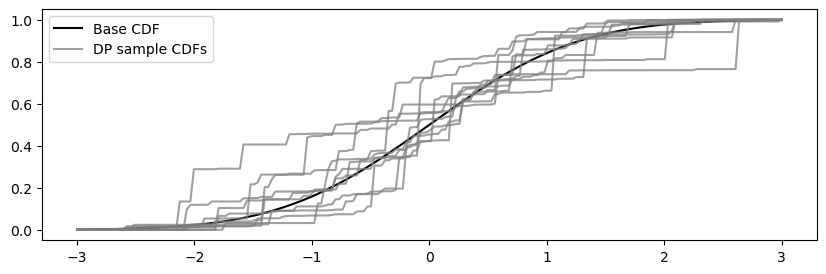

In [193]:
alpha=10
support=np.linspace(-3, 3, 200)
p0=stats.norm # could be a posterior mixed p0 + discrete point mass posterior

n=10
k=alpha*100

beta = stats.beta.rvs(1, alpha, size=(n,k))
w = np.zeros(beta.shape)
w[:, 0] = beta[:,0]
w[:,1:] = beta[:,1:] * (1-beta[:,:-1]).cumprod(axis=1)

y = p0.rvs(size=(n,k))

plt.figure(figsize=(10,3))
plt.plot(support, p0.cdf(support), c="k", label="Base CDF")
sample_cdfs = (w[..., np.newaxis] * np.less.outer(y, support)).sum(axis=1)
plt.plot(support, sample_cdfs[0], c="gray", alpha=0.75, label="DP sample CDFs")
plt.plot(support, sample_cdfs[1:].T, c="gray", alpha=0.75)
plt.legend();

## Dirichlet Process Mixtures: Nonparametric Density Estimation  

https://www.pymc.io/projects/examples/en/latest/mixture_models/dp_mix.html#dirichlet-process-mixtures

$$
\begin{align*}
x_i \sim f_{\theta_i} &\equiv{} \mathcal N(\theta_i, \sigma=0.3) = \int \mathcal N(\theta_i, \sigma=0.3) d\theta_i = \sum_{j=1}^\infty w_j \mathcal N(y_j, \sigma=0.3) \\
\theta_i \sim p &\equiv{} DP(\underset{2 \;\; \mathcal N(0,1)}{\alpha,\;\;\; p_0)}  \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \textstyle \approx \sum_{j=1}^n w_j \mathcal N(y_j, \sigma=0.3) \\ 
p &={} \textstyle \sum_{j=1}^\infty w_j 1_{y_j}\\
y_j &\sim{} \mathcal N(0,1) \\
w_j &={} \beta_j  \textstyle \prod_{k=1}^{j-1}(1-\beta_k)\\ 
\beta_j &\sim{} \text{Beta}(\color{gray}{\alpha\text{ [for Beta]}}=1,\beta=\alpha=2\color{gray}{\text{ [from DP]}})
\end{align*}$$





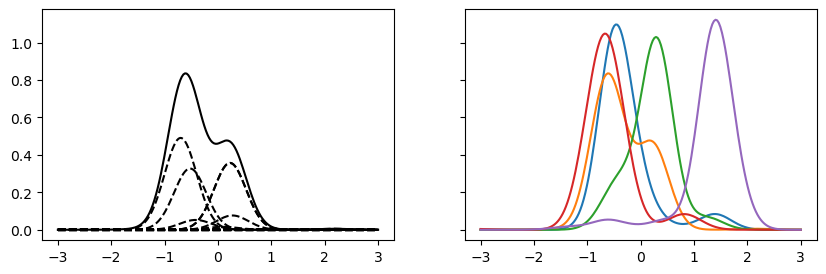

In [208]:
n,k = 5,30
alpha = 2
p0 = stats.norm
f = lambda x,theta: stats.norm(theta, 0.3).pdf(x)

beta = stats.beta.rvs(1, alpha, size=(n,k))
w = np.zeros(beta.shape)
w[:,0] = beta[:,0]
w[:,1:] = beta[:,1:]*(1-beta[:,:-1]).cumprod(axis=1)
theta = p0.rvs(size=(n,k))

dpm_pdf_components = f(support, theta[..., np.newaxis])
dpm_pdfs = (w[..., np.newaxis] * dpm_pdf_components).sum(axis=1)
fig,ax=plt.subplots(1,2,figsize=(10, 3),sharey=True)
ix = 1
ax[0].plot(support, dpm_pdfs[ix], c="k", label="Density")
ax[0].plot(support, (w[..., np.newaxis] * dpm_pdf_components)[ix, 0],"--", c="k", label="Mixture components (weighted)",)
ax[0].plot(support, (w[..., np.newaxis] * dpm_pdf_components)[ix].T, "--", c="k")
ax[1].plot(support, dpm_pdfs.T);  

## (Truncated) Dirichlet Process Mixture Models:<br>Nonparametric Density Estimation

$$
\begin{align*}
x_i \sim {}&  \sum_{j=1}^k w_j \mathcal N (\mu_j, \tau_j) & \mu_j \sim {}& \mathcal N (0, \lambda_j) & \tau_j, \lambda_j \sim {}& \text{Gamma}(10,1) \\
w_j ={}&  \beta_j \prod_{i=1}^{j-1} (1-\beta_i) & \beta_j \sim{}& \text{Beta}(1,\alpha) &  \alpha \sim {}& \text{Gamma}(1,1)
\end{align*}$$

In [232]:
import pytensor.tensor as pt

def stick_breaking(beta):
    portion_remaining = pt.concatenate([[1], pt.extra_ops.cumprod(1 - beta)[:-1]])
    return beta * portion_remaining

k = 30
with pm.Model(coords={"component": np.arange(k), "obs_id": np.arange(n_)}) as model:
    alpha = pm.Gamma("alpha", 1.0, 1.0); 
    beta = pm.Beta("beta", 1.0, alpha, dims="component")
    w = pm.Deterministic("w", stick_breaking(beta), dims="component")
    tau = pm.Gamma("tau", 1.0, 1.0, dims="component")
    lambda_ = pm.Gamma("lambda_", 10.0, 1.0, dims="component")
    mu = pm.Normal("mu", 0, tau=lambda_ * tau, 
                   #transform=pm.distributions.transforms.univariate_ordered, 
                   dims="component")
    obs = pm.NormalMixture("obs", w, mu, tau=lambda_*tau, observed=x_, dims="obs_id")
    
    trace = pm.sample(tune=5000, init="advi", target_accept=0.95)  
    

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 34000
Interrupted at 33,999 [16%]: Average Loss = 3,478.4
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, tau, lambda_, mu]


Sampling 4 chains for 5_000 tune and 1_000 draw iterations (20_000 + 4_000 draws total) took 590 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 90 divergences after tuning. Increase `target_accept` or reparameterize.


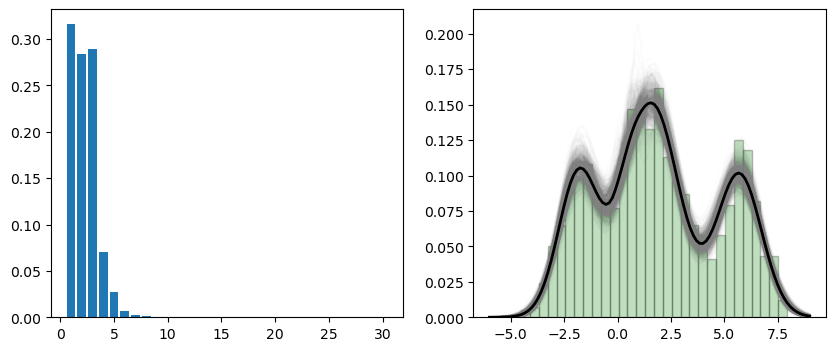

In [233]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
support = np.linspace(-6,9,100)
ave_mixture=0*support
reps=1000
for j in range(reps):
    
    chain = np.random.choice([0,1,2,3])
    draw = np.random.choice(np.linspace(0,999,1000,dtype=int))
    mixture = stats.norm(trace.posterior['mu'][chain,draw],
                         (trace.posterior['tau'][chain,draw]*\
                          trace.posterior['lambda_'][chain,draw])**-0.5).pdf(np.array([support]*k).reshape(k,100).T)    
    mixture = (mixture*trace.posterior['w'][chain,draw].values).sum(axis=1)
    plt.plot(support, mixture, c='gray', alpha=0.01)
    ave_mixture += mixture/reps
    
ax[0].bar(x=np.linspace(1,k,k), height=trace.posterior['w'].mean(("chain", "draw")))
ax[1].plot(support, ave_mixture, 'k', lw=2)
ax[1].hist(x_, density=True, color='green', edgecolor='black', alpha=0.25, bins=30);


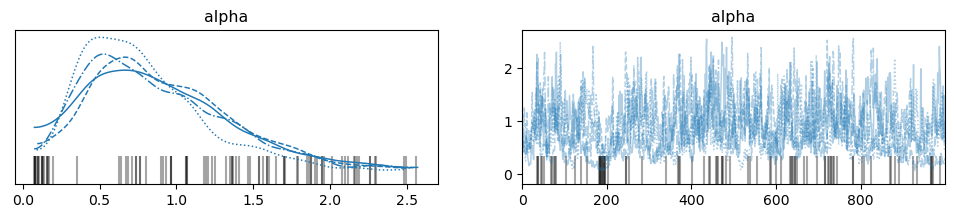

In [242]:
az.plot_trace(trace, var_names=["alpha"]);


In [245]:
{'component':model.coords['component'][:5]}

(0, 1, 2, 3, 4)

/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/traceplot.py:217: UserWarning: A valid var_name should be provided, found {'tau'} expected from {'mu', 'w'}
  warnings.warn(


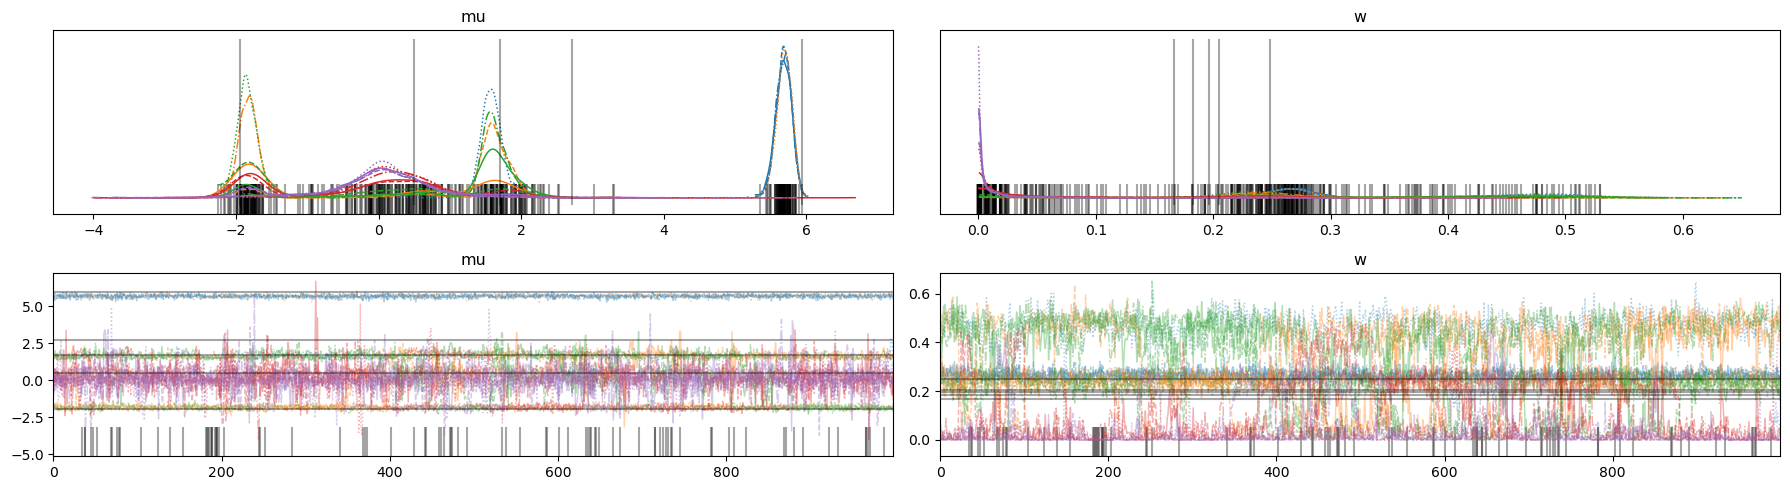

In [249]:
fig,ax = plt.subplots(2,2,figsize=(18,5))
az.plot_trace(trace, var_names=["mu", "w"], #  "tau", 
              coords={'component': list(model.coords['component'][:5])},
                     lines=[("mu", {}, [mu_k_true]), 
                            ("tau", {}, [1/sigma2_k_true]), 
                            ("w", {}, [p_true])], axes=ax.T)
plt.tight_layout();

In [253]:
with model:
    pm.compute_log_likelihood(trace)

#display(az.loo(trace))
#display(az.waic(trace))


Computed from 4000 posterior samples and 1000 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -2389.11    14.30
p_loo        8.04        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     1000  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

Computed from 4000 posterior samples and 1000 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -2389.09    14.30
p_waic        8.03        -

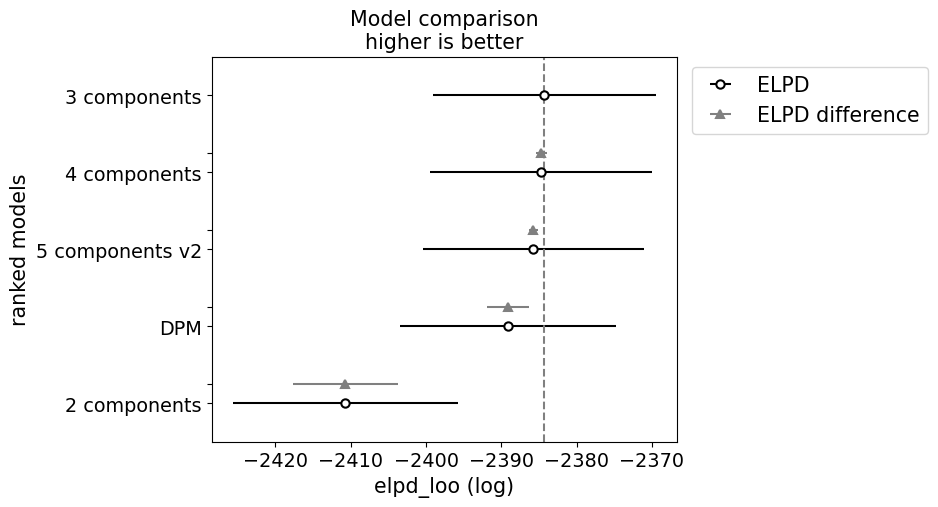

In [255]:
az.plot_compare(az.compare({"DPM": trace,
                            #"5 components": idata_,
                            "4 components": idata_k_4, 
                            "3 components": idata_k_3,
                            "2 components": idata_k_2,
                            "5 components v2": idata_k_5}), insample_dev=False);

In [257]:
az.compare({#"DPM": trace,
            #"5 components": idata_,
            "4 components": idata_k_4, 
            "3 components": idata_k_3,
            #"2 components": idata_k_2,
            #"5 components v2": idata_k_5
           })

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
3 components,0,-2384.324553,7.722610,0.000000,1.0,14.788332,0.00000,False,log
4 components,1,-2384.685697,8.777748,0.361144,0.0,14.745650,0.69475,False,log


## Bayes beats Overfitting not caused by Inductive Bias 

**Machine learning** is concerned with the **underfitting (bias) - overfitting (variance)** spectrum affecting $p( y|\hat \theta)$ due to<br><br>(a)$\;\;$ mispecification of $p(y|\theta)\quad$ and subsequent $\quad$(b)$\;\;$  ***conditioning*** on a data set specific MLE $\hat \theta$ estimation

Using $p(y|\theta^{MAP})$ similarly risks **overfitting** as a result of **conditioning** on $\theta^{MAP} = \underset{\theta}{\text{argmax}} p(\theta|y)$

For prior $p(\theta)$ and exactly correctly specified $p(y|\theta)$ the **overfitting** caused by **conditioning** on a single **optima** can be avoided using

$$\int p(\tilde y|\theta) p(\theta | y) d\theta \overset{\tilde y \perp \!\!\!\perp y | 
\theta} = p(\tilde y | y) \quad \color{purple}{\underset{called}{\overset{\text{this is}}{\longleftarrow}} \quad \text{the posterior predictive distribution}}$$

$$\text{so }\quad \overline{p(y_i|\theta)} = \frac{1}{T}\sum_{t=1}^T p(y_i|\theta_t) \approx E_{p(\theta|y)}[p(y_i|\theta)] \quad  \text{ beats } \quad p\left(y_i|\bar \theta = \frac{1}{T}\sum_{t=1}^T \theta^{(t)} \approx E_{p(\theta|y)}[\theta]\right)$$

> and note also ***Bayesian model averaging*** $\quad\sum_{j=1}^k p(\tilde y|M_j) \Pr( M_j |y) $ 
>
> $$\small \quad\text{with } \quad \Pr( M_j |y) = \frac{\Pr( M_j |y) \Pr( M_j)}{\sum_{j=1}^k \Pr( M_j |y) \Pr( M_j)} \quad \text{ and } \quad \Pr(y | M_j)= \int p(y|\theta_j, M_j)p(\theta_j | M_j)d\theta_j$$


<font style='color:navy'>but the **inductive bias** implicit in the $p(y|\theta)p(\theta)$ specification still causes differential **bias** and **overfitting** in predictions (where the term "differential" indicates that prediction domains can simultaneously entail both **under** and **overfitting**)</font>

<font style='color:gray'>This is reminiscent of ***Bayes optimal classifiers*** $b(x) = \underset{k}{\text{argmax}} \underset{\int p_\theta(\tilde y=k|x) p(\theta) d\theta}{p(\tilde y=k|x)}$ minimizing ***risk*** $\mathcal{R}(g) = Pr(g(x) \neq y_i)$
so $\mathcal{R}(b)\leq\mathcal{R}(f)$ for any decision rule $f$ to the degree that the modeling structure $p_\theta(\tilde y=k|x) p(\theta)$ is correct</font>


## What Bayes Does and Does Not

**Conditional** on the probabilistic modeling specification **Bayesian posterior analysis** provides coherent uncertainty characterizations, <u>but these are still **conditional** on the ***inductive biases*** of the modeling and/or idosyncratic sampling</u>...

$\quad\;\;\bullet\;$ **Bayesian posterior uncertainty** characterizes **information propegation** <u>but not model mispecification</u>

$\quad\;\;\bullet\;$ That's what ~~**Bayes factors**, **DIC**~~, ***WAIC***, and **LOO-CV** are for:<br>$\quad\quad\;$ model comparison and estimation of future **out of sample** performance 
      
$\quad\;\;\bullet\;$ Addressing **Inductive Bias** means assessing [**lack of fit**](https://en.wikipedia.org/wiki/Goodness_of_fit) and **influential data point diagnostics**<br>$\quad\quad\;$ and can be formulated in a **pointwise manner** on the basis of the **Bayesian deviance** formulation 
    
$\quad\quad\quad\bullet\;$  See Section 6 of [Spiegalhalter et al. (2002)](https://fisher.stats.uwo.ca/faculty/aim/2015/9938/articles/SpiegelhalterJRSSB2002.pdf), [Gelman, Meng, and Stern (1996)](http://www.stat.columbia.edu/~gelman/research/published/A6n41.pdf), and [Rubin (1984)](http://www.cs.columbia.edu/~blei/fogm/2018F/materials/Rubin1984.pdf)

<u>ALL MODELS can ***overfit*** and ***underfit***...</u> ***Bayesian random variable parameters*** can be "integrated out" so<br> 
$\quad\;\;\bullet\;$ predictions integrating over ***posterior uncertainty*** don't ***overfit*** with "optimal" data set specific point estimates<br>
$\quad\;\;\bullet\;$ but, can still differentially ***under*** and ***overfit*** as a result of ***inductive biases*** from modeling specification choices<br>
$\quad\;\;\bullet\;$ and/or the updated probabilistic beliefs nonetheless spurious resulting from idiosyncratic sampling variation 

<!-- ***conditioning*** on point estimates 
 reminants of their ***inductive biases*** can still be left behind...-->





Bayes characterizes the uncertainty in the overall structure. Bayes is just another model. The real question is not parameter uncertainty, it's out of sample performance. 

## Week 12 Homework (10)

### Q1: define 

- Gaussian Processes (GPs) and stochastic processes generally
- Variational inference using the Evidence Lower Bound (ELBO)

### Q2: more GPs

Repurpose PyMC documentation to provide a demonstration of Gaussian processes for a different dataset context than the PyMC examples.

### Q3: more VI/ELBO

Repurpose PyMC documentation to provide a demonstration of a neural network fit with variational inference for a different dataset context than the PyMC examples.

